# Practical Time Series Analysis

## Week 5: Akaike Information Criterion (AIC), Mixed Models, Integrated Models

**1. Akaike Information Criterion (AIC)**

**2. Mixed models: ARMA, ARIMA**

**3. Real-world datasets**

In [2]:
library(forecast)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


## 1. Akaike Information Criterion (AIC)

AIC is similar to $R^2$ metric in the sense that both consider a regularization rate that varies directly proportionally with the order of the terms present in the regression.

**Simulation Example**

$X_t = Z_t + 0.7 X_{t-1} - 0.2 X_{t-2}$

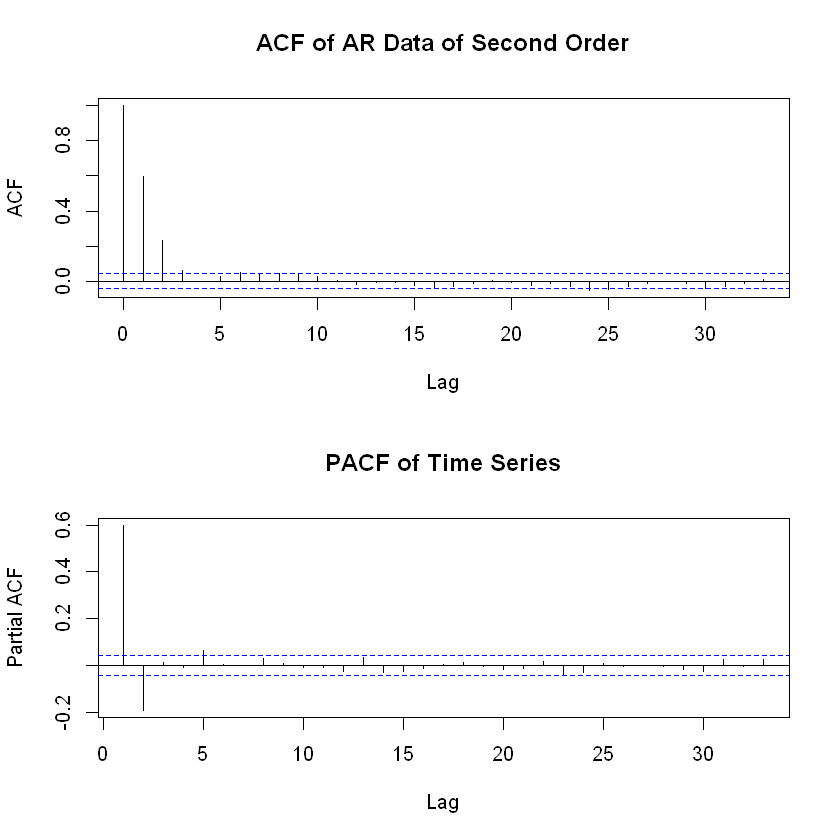

In [3]:
# simulation example
set.seed(43)
data = arima.sim(list(order = c(2,0,0), ar = c(0.7, -0.2)), n = 2000)
par(mfrow = c(2, 1))
acf(data, main = "ACF of AR Data of Second Order")
acf(data, type = "partial", main = "PACF of Time Series")

In [4]:
SSE=NULL
AIC=NULL
for (p in 1:5) {
    m = arima(data, order=c(p,0,0), include.mean=FALSE )
    SSE[p] = sum(resid(m)^2)
    AIC[p] = m$aic
    print( m$coef )
    print( paste(m$aic, sum(resid(m)^2)) )
}

      ar1 
0.5969948 
[1] "5751.73196762524 2072.83193501059"
       ar1        ar2 
 0.7111457 -0.1911552 
[1] "5679.27375222458 1997.00667996082"
        ar1         ar2         ar3 
 0.71359315 -0.20027406  0.01281966 
[1] "5680.94495534325 1996.67791506654"
         ar1          ar2          ar3          ar4 
 0.713676747 -0.201599645  0.017553047 -0.006629412 
[1] "5682.85704377107 1996.58997811327"
        ar1         ar2         ar3         ar4         ar5 
 0.71410825 -0.20268672  0.03019322 -0.05154692  0.06293048 
[1] "5676.91730818182 1988.65973372245"


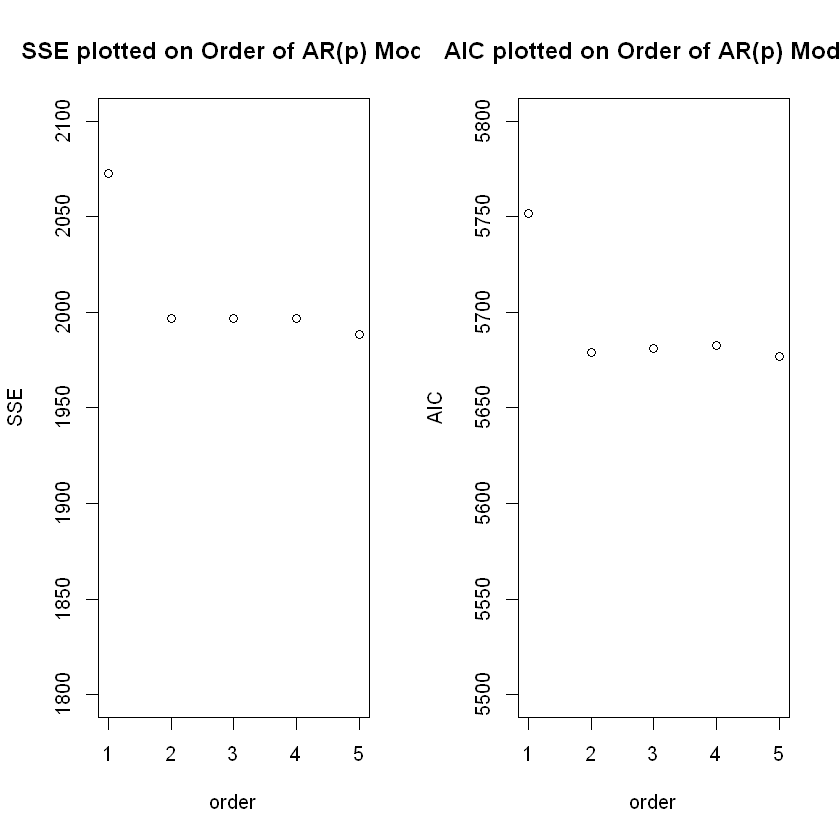

In [5]:
par(mfrow=c(1,2))
order=c(1,2,3,4,5)
plot(SSE~order, main="SSE plotted on Order of AR(p) Model", ylim=c(1800, 2100))
plot(AIC~order, main="AIC plotted on Order of AR(p) Model", ylim=c(5500, 5800))

It can be seen that AIC falls down agressively between order 1 and 2, and remains almost the same on the rest.

**The AIC**

Assess the relative quality of several competing models

* Give credit for models which reduce the error sum of squares
* Build a penalty for models which bring in too many parameters

Formula

$AIC = -2 \cdot log(maximum \; likelihood) + 2 \cdot (number \; of \; paramenters \; in \; the \; model)$

Simple version for the AIC of a givern model with $p$ terms:

$ AIC = log(\hat{\sigma}^2) + \frac{n + 2 \cdot p}{n}$

, where $\hat{\sigma}^2 = \frac{SSE}{n}$

## 2. Mixed Models: ARMA, ARIMA

### 2.1. ARMA

**ARMA(p, q) Definition**

Bring together an MA(q) and an AR(p)

$X_t = \color{green}{Noise} + \color{blue}{AutoRegressive Part} + \color{yellow}{Moving Average Part}$

$X_t = \color{green}{Z_t} + \color{blue}{\phi_1 X_{t-1} + ... + \phi_p X_{t-p}} + \color{yellow}{\theta_1 X_{t-1} + ... + \theta_p X_{t-p}}$

**Mixed process to Moving Average process (Backward Shift Operator)**

$\theta (B) Z_t = \phi (B) X_t$

$\frac{\theta(B)}{\phi(B)} Z_t = X_t$

**Mixed process to Auto Regressive process (Backward Shift Operator)**

$\theta (B) Z_t = \phi (B) X_t$

$Z_t = \frac{\phi(B)}{\theta(B)} X_t$

**Code Example**

$X_t = 0.7 X_{t-1} + Z_t + 0.2 Z_{t-1}$

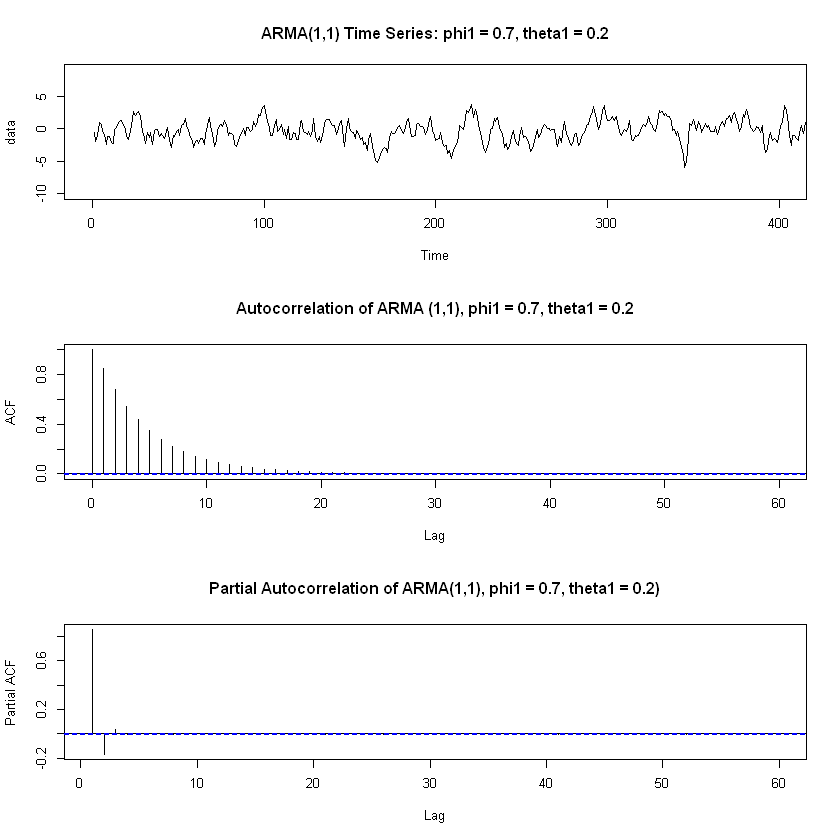

In [6]:
set.seed(500)
data = arima.sim(list(order = c(1, 0, 1), ar = 0.8, ma = 0.2), n = 1000000)
par(mfcol = c(3,1))
plot(data, main = "ARMA(1,1) Time Series: phi1 = 0.7, theta1 = 0.2", xlim = c(0, 400))
acf(data, main = "Autocorrelation of ARMA (1,1), phi1 = 0.7, theta1 = 0.2")
acf(data, type = "partial", main = "Partial Autocorrelation of ARMA(1,1), phi1 = 0.7, theta1 = 0.2)")

* $(1 - 0.7 B) X_t = (1 + 0.2 B) Z_t$

* $\theta(B) = 1 + \beta_1B = 1 + 0.2B$

* $\phi(B) = 1 - \alpha_1 B = 1 - 0.7 B$

Turning denominator into geometric series:

* $\phi(B) = \frac{\phi (B)}{\theta (B)} = 1 - 0.9 B + 0.18 B^2 - 0.036 B^3 + ...$

**Dataset example: Discoveries**

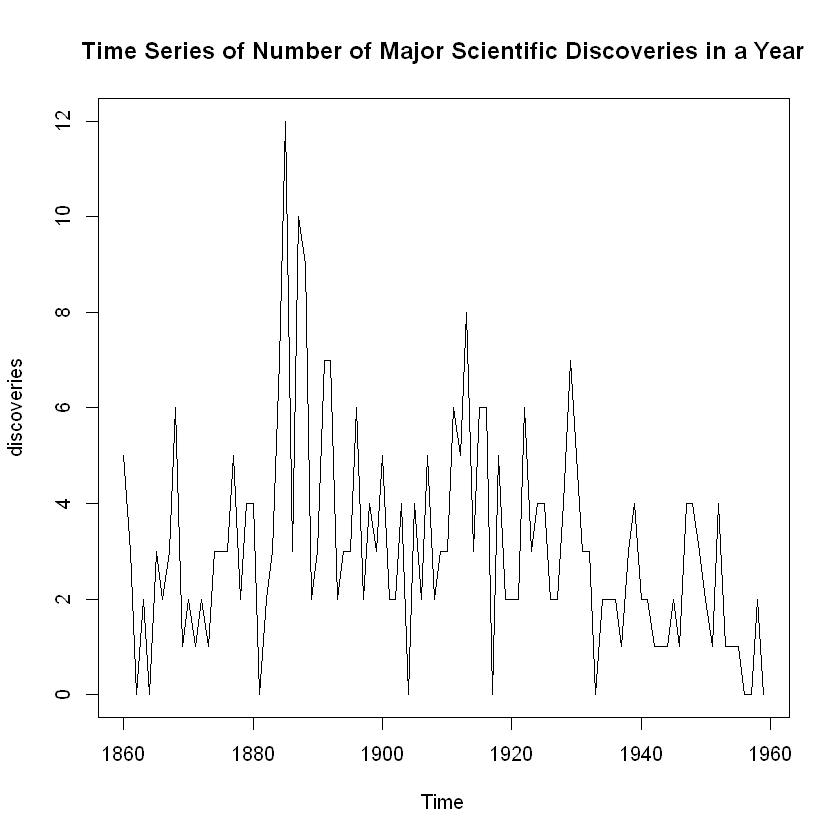

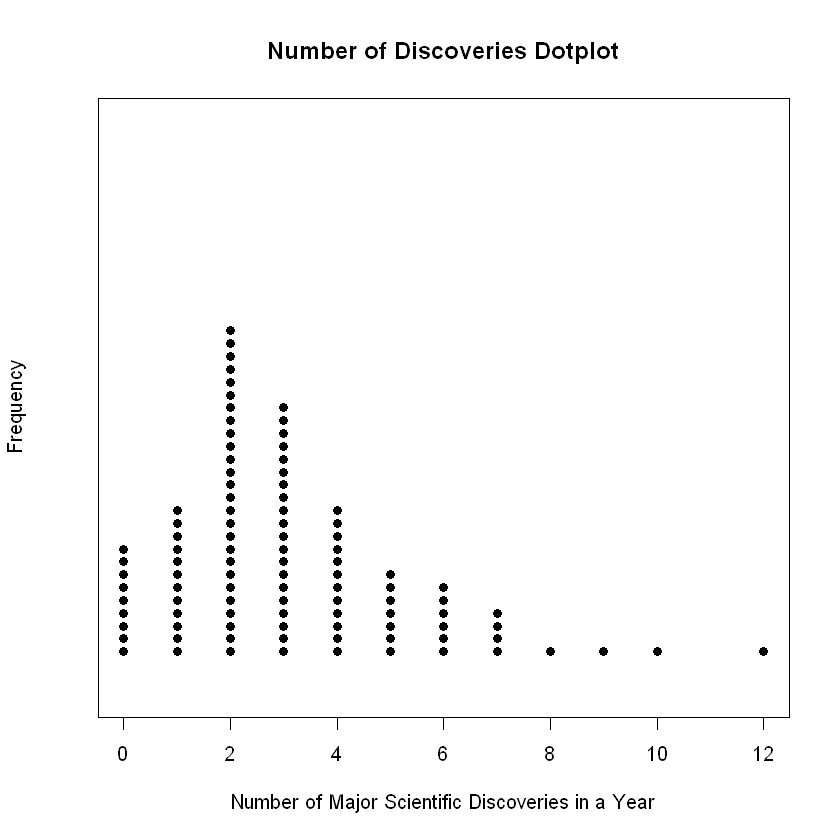

In [7]:
plot(discoveries,
main = "Time Series of Number of Major Scientific Discoveries in a Year")

stripchart(discoveries, method = "stack", offset=.5, at=.15,pch=19,
main="Number of Discoveries Dotplot",
xlab="Number of Major Scientific Discoveries in a Year",
ylab="Frequency")

In a ARMA model, both ACF and PACF tails off indefinitely.

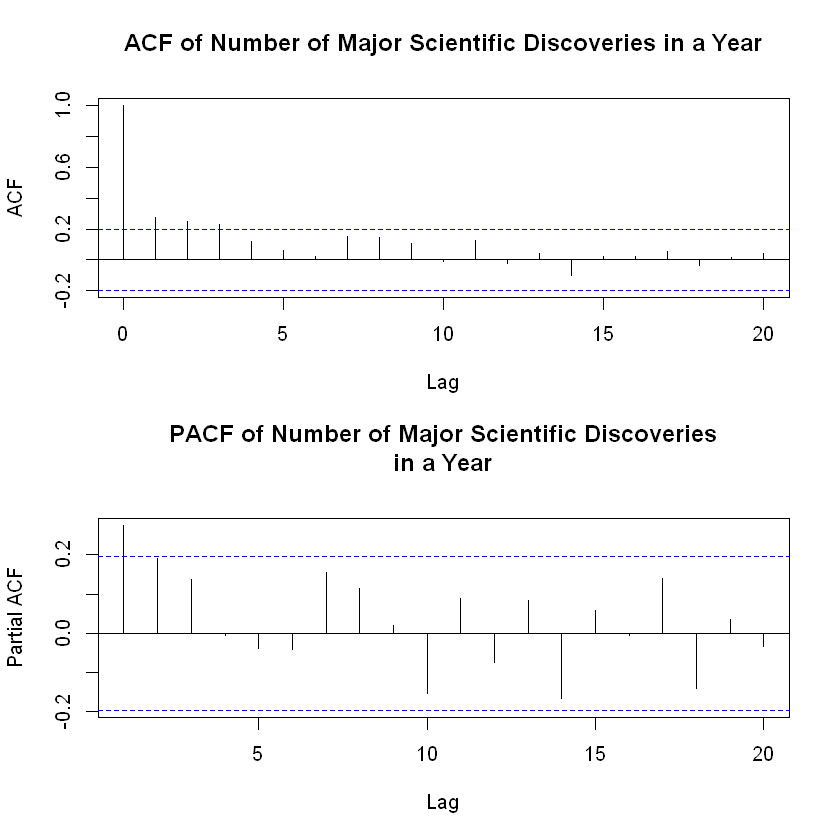

In [8]:
par(mfcol = c(2,1 ))
acf(discoveries, main="ACF of Number of Major Scientific Discoveries in a Year")
acf(discoveries, type="partial", main="PACF of Number of Major Scientific Discoveries
in a Year")

In [9]:
# best ARMA model = ARMA(1,0,1)
arima(x = discoveries, order = c(1, 0, 1))


Call:
arima(x = discoveries, order = c(1, 0, 1))

Coefficients:
         ar1      ma1  intercept
      0.8353  -0.6243     3.0208
s.e.  0.1379   0.1948     0.4728

sigma^2 estimated as 4.401:  log likelihood = -216.1,  aic = 440.2

In [10]:
# auto arima
auto.arima(discoveries, d=0, approximation=FALSE)

Series: discoveries 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.8353  -0.6243  3.0208
s.e.  0.1379   0.1948  0.4728

sigma^2 estimated as 4.538:  log likelihood=-216.1
AIC=440.2   AICc=440.62   BIC=450.62